In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
data = datasets.load_iris()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y = data.target.astype(str)

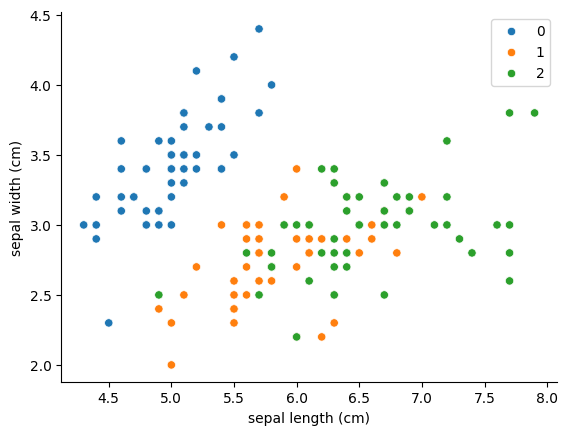

In [5]:
_ = sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue = y)
sns.despine()

In [6]:
clf = DecisionTreeClassifier()

In [7]:
X = df[['sepal length (cm)', 'sepal width (cm)']]

In [8]:
clf.fit(X, y)

DecisionTreeClassifier()

In [9]:
preds = clf.predict(X) # Purposely overfit the data

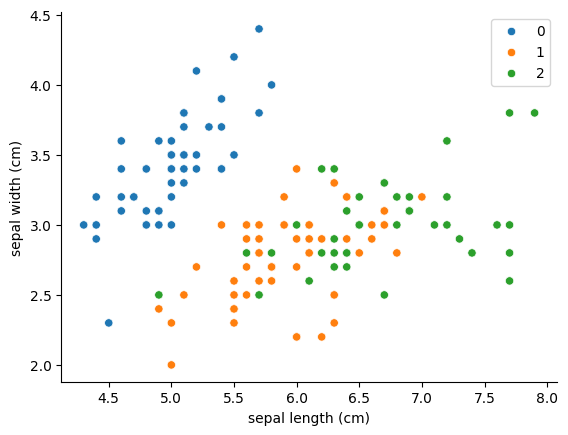

In [10]:
_ = sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue = preds) # Using hues = preds instead of y; there are slight differences
sns.despine()

In [11]:
accuracy_score(y, preds)

0.9266666666666666

In [12]:
x_space = np.arange(4, 8, 0.1)
y_space = np.arange(1.5, 4.5, 0.1)

In [13]:
x_for_plot = [] # Create a decision tree plot (i.e., decision boundary visualization)
y_for_plot = []
outputs = []

for x_val in x_space:
    for y_val in y_space:
        current = pd.DataFrame({'sepal length (cm)' : [x_val],
                                'sepal width (cm)' : [y_val]})
        pred = clf.predict(current)
        x_for_plot.append(x_val)
        y_for_plot.append(y_val)
        outputs.append(str(pred[0]))

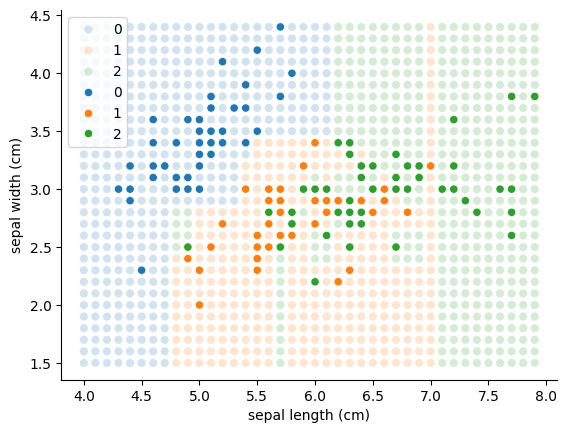

In [14]:
_ = sns.scatterplot(x = x_for_plot, y = y_for_plot, hue = outputs, alpha = 0.2)
_ = sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue = y)
sns.despine()

In [15]:
clf.tree_.max_depth # 12 levels is deep (especially for one with just 2 variables)

12

In [16]:
clf = DecisionTreeClassifier(max_depth = 2)

In [17]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [18]:
preds = clf.predict(X)

In [19]:
accuracy_score(y, preds)

0.7733333333333333

In [20]:
x_for_plot = [] # Create a decision tree plot again (i.e., decision boundary visualization)
y_for_plot = []
outputs = []

for x_val in x_space:
    for y_val in y_space:
        current = pd.DataFrame({'sepal length (cm)' : [x_val],
                                'sepal width (cm)' : [y_val]})
        pred = clf.predict(current)
        x_for_plot.append(x_val)
        y_for_plot.append(y_val)
        outputs.append(str(pred[0]))

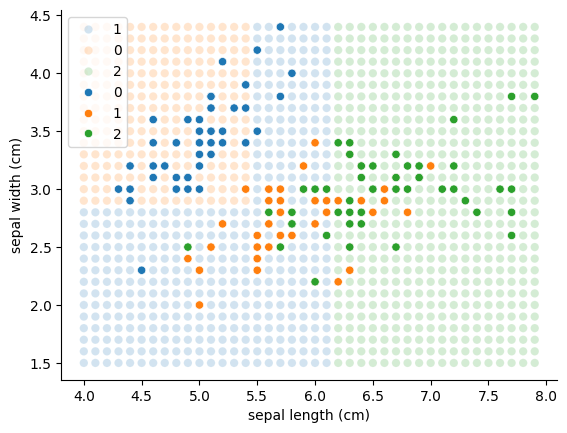

In [21]:
_ = sns.scatterplot(x = x_for_plot, y = y_for_plot, hue = outputs, alpha = 0.2)
_ = sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = df, hue = y)
sns.despine()

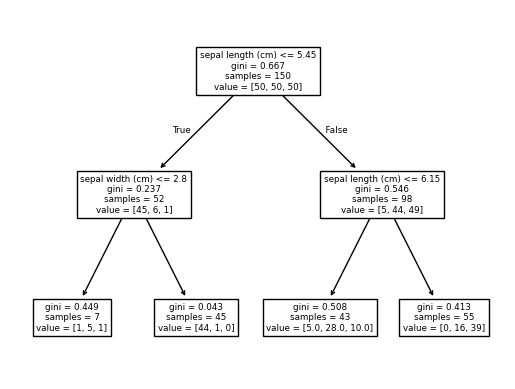

In [27]:
_ = plot_tree(clf, feature_names=['sepal length (cm)', 'sepal width (cm)'])